In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Questão 2: Análise mono-variada de todos os preditores

In [27]:
wp = pd.read_csv('dataset\water_potability.csv')
wp.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [28]:
#forma do dataset com todas as linhas
wp.shape

(3276, 10)

In [29]:
#forma do dataset sem as linhas com dados faltando
mxmh_new = wp.dropna()
mxmh_new.shape

(2011, 10)

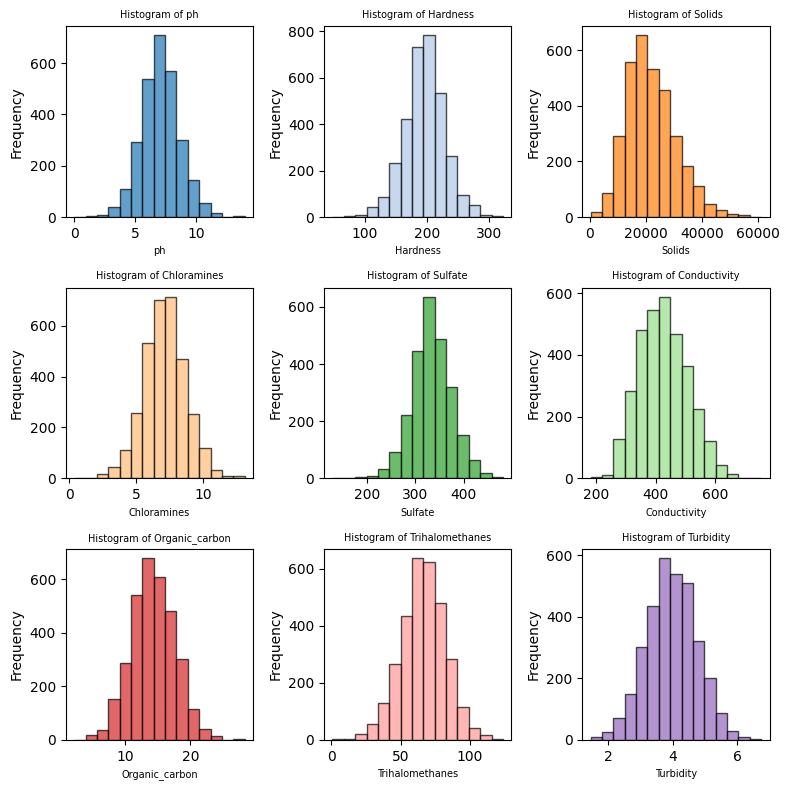

In [30]:
# configura o plot dos histogramas
num_histograms = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes_flat = axes.flatten()
colors = plt.cm.tab20.colors[:num_histograms]

# percorre a matriz de variáveis numéricas e plota histogramas de diferentes cores
for i, (column, ax) in enumerate(zip(wp.columns, axes_flat)):
    wp[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)
    
# apaga os subplots vazios
if i <= num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# ajusta o layout
plt.tight_layout()
plt.show()
